#Project Datasci 1/2563

สมาชิก
*   61102010139  นางสาวเจษฎาภรณ์  พุทธโกศัย
*   61102010142  นางสาวณริสสา   ดาราวรรณกุล
*   61102010151  นายปวริศ  ศรีพิบูลย์
*   61102010153  นางสาวปิยธิดา ไทยง้วน



In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# การ Exploratory Data Analysis (EDA)

**ข้อมูลสำหรับ Train**

In [ ]:
#ทำการอ่านข้อมูลจากไฟล์ Train
data_train = pd.read_csv("/content/drive/MyDrive/DataSci/ProjectDataSci/ย๊ากกกกกก/train_ctrUa4K.csv")
data_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#แปลงค่า Loan_StatusจากString เป็น Integer
data_train = data_train.drop(['Loan_ID'], axis=1)

data_train['Loan_Status'].replace('N', 0, inplace=True)
data_train['Loan_Status'].replace('Y', 1, inplace=True)

In [ ]:
#ตรวจสอบคอลัมน์ที่มีค่าว่าง
for features in data_train:
  if data_train[features].isnull().values.any():
    print(features)


Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [ ]:
#แปลงค่าในคอลัมน์ Dependents ค่า3+ เป็น 3 แบบnumeric
data_train['Dependents'] = data_train['Dependents'].replace('3+',3)

#คอลัมน์ที่มีค่าว่างแทนค่าด้วย Median แทนเป็น Numeric
for feature in ['Dependents','LoanAmount','Loan_Amount_Term']:
  data_train[feature].fillna(data_train[feature].dropna().median(),inplace = True)
  
#คอลัมน์ที่มีค่าว่างแทนค่าด้วย Mode แทนเป็น Category
for feature in ['Gender','Married','Self_Employed','Credit_History']:
  data_train[feature].fillna(data_train[feature].dropna().mode().values[0],inplace = True)

In [ ]:
#ทำ Feature Engineering ของไฟล์ Train
#นำข้อมูลในคอลัมน์Self_Employ_Area มาบวกกับProperty_Area
#จะทำให้ทำนายได้ดีขึ้น
data_train['Self_Employ_Area'] = data_train['Self_Employed']+data_train['Property_Area']

In [ ]:
#แปลงString เป็น Integer
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['Male','Female'])
data_train['Gender']=num.transform(data_train['Gender']).astype('int')

num.fit(['Yes','No'])
data_train['Married']=num.transform(data_train['Married']).astype('int')

num.fit(['No','Yes'])
data_train['Self_Employed']=num.transform(data_train['Self_Employed']).astype('int')

num.fit(['Urban','Rural','Semiurban'])
data_train['Property_Area']=num.transform(data_train['Property_Area']).astype('int')

num.fit(['NoUrban','YesUrban','NoSemiurban','YesSemiurban','NoRural','YesRural'])
data_train['Self_Employ_Area']=num.transform(data_train['Self_Employ_Area']).astype('int')


data_train['Education'] = data_train['Education'].replace('Graduate',1)
data_train['Education'] = data_train['Education'].replace('Not Graduate',0)
data_train['Dependents'] = data_train['Dependents'].replace('1',1)
data_train['Dependents'] = data_train['Dependents'].replace('0',0)
data_train['Dependents'] = data_train['Dependents'].replace('2',2)



In [ ]:
#ตรวจสอบค่าของ applicantIncome ตรวจสอบ outlier
#พบว่ามีค่าที่ต่างกันมาก
print(data_train.shape)
print('data_train applicantIncome has value between {} and {}'.format(data_train['ApplicantIncome'].max(),data_train['ApplicantIncome'].min()))

(614, 13)
data_train applicantIncome has value between 81000 and 150


In [ ]:
#นำค่า applicantIncome มาทำ Z score เพื่อลดค่าไม่ให้ต่างกันมาก

from scipy import stats

z_scores = stats.zscore(data_train['ApplicantIncome'])

filtered_entries = np.abs(z_scores) < 3
data_train = data_train[filtered_entries]

In [ ]:
print(data_train.shape)
print('data_train applicantIncome has value between {} and {}'.format(data_train['ApplicantIncome'].max(),data_train['ApplicantIncome'].min()))

(606, 13)
data_train applicantIncome has value between 20833 and 150


# Visualize

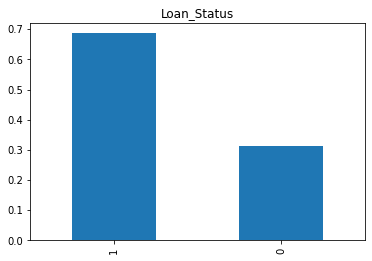

In [ ]:
data_train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

In [ ]:
data_train["Loan_Status"].value_counts(normalize=True)*100

1    68.646865
0    31.353135
Name: Loan_Status, dtype: float64

จากคอลัมน์ Loan_Status 1 คือ Y ,  0 คือ N
ตอบ Y  ประมาณ 68 %  และ N ประมาณ 31%

**ใช้ pairplot ดูความสัมพันธ์**

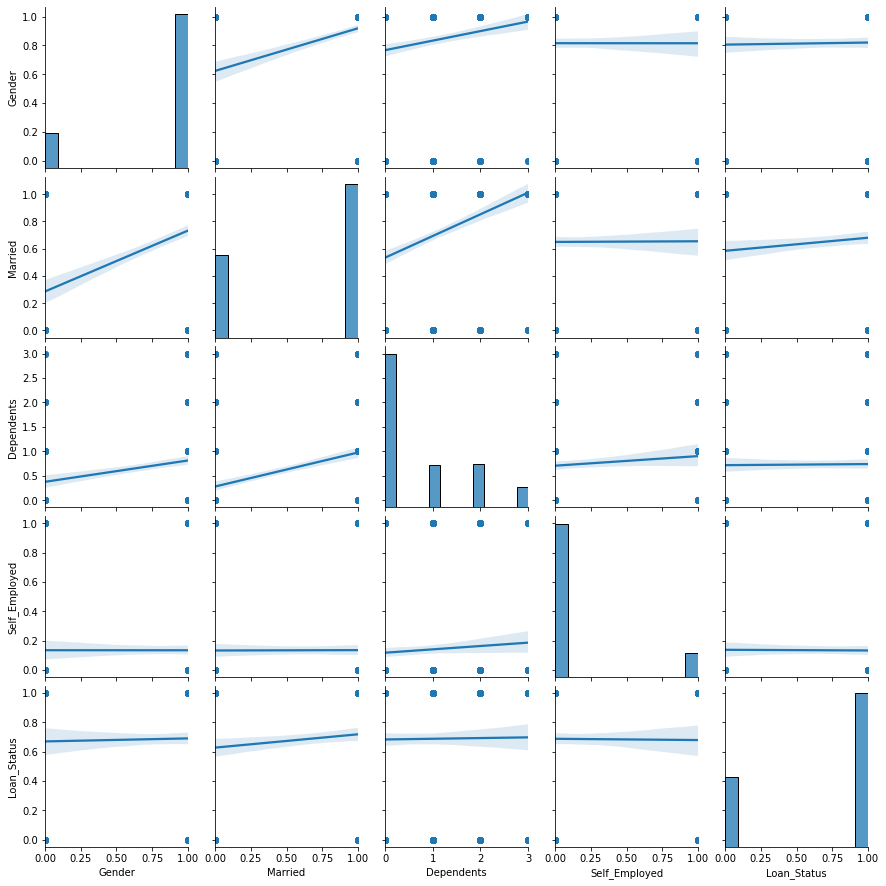

In [ ]:
columns = ['Gender','Married','Dependents','Self_Employed','Loan_Status']
sns.pairplot(data = data_train[columns] ,  kind = 'reg')

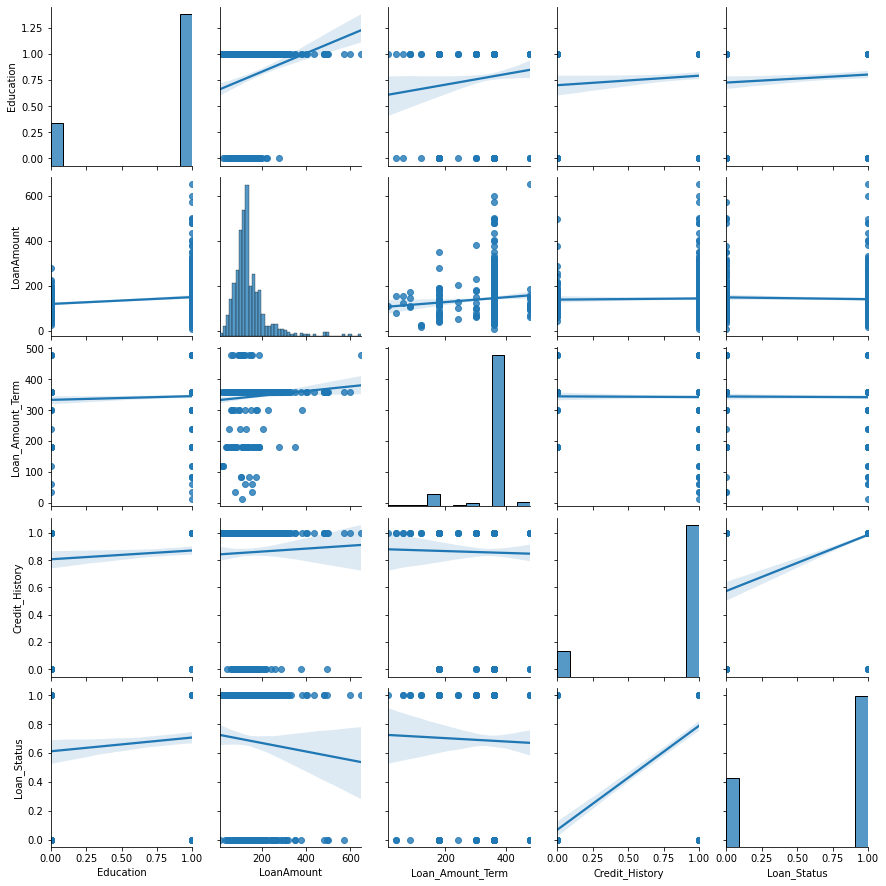

In [ ]:
columns1 =['Education','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']
sns.pairplot(data = data_train[columns1] ,  kind = 'reg')

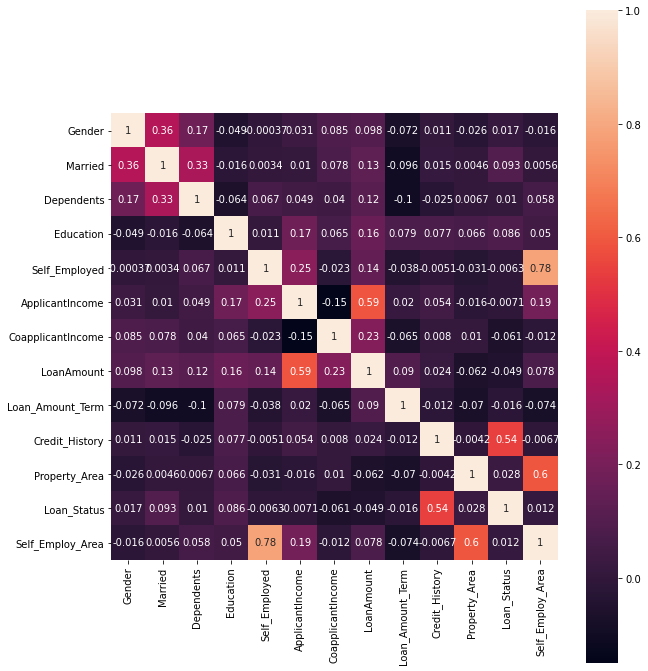

In [ ]:
#ดูความสัมพันธ์ว่ามีผลเชิงบวกต่อกันหรือไม่ โดยสีเข้ม=ค่ามาก สีจาง=ค่าน้อย
corr_data = data_train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(corr_data, vmax=1, square=True,annot=True);

จากตารางพบว่า ถ้าเทียบค่า Credit_History กับ Loan_Status = 0.54 มีความสัมพันธ์เชิงบวก

**ข้อมูลสำหรับ Test**

In [ ]:
#ทำการอ่านข้อมูลจากไฟล์ Test
data_test = pd.read_csv("/content/drive/MyDrive/DataSci/ProjectDataSci/ย๊ากกกกกก/test_lAUu6dG.csv")
data_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
#แปลงค่าในคอลัมน์ Dependents ค่า3+ เป็น 3 แบบnumeric
data_test['Dependents'].replace('3+', 3, inplace=True)

#คอลัมน์ที่มีค่าว่างแทนค่าด้วย Median แทนเป็น Numeric
for feature in ['Dependents','LoanAmount','Loan_Amount_Term']:
  data_test[feature].fillna(data_test[feature].dropna().median(),inplace = True)

#คอลัมน์ที่มีค่าว่างแทนค่าด้วย Mode แทนเป็น Category
for feature in ['Gender','Married','Self_Employed','Credit_History']:
  data_test[feature].fillna(data_test[feature].dropna().mode().values[0],inplace = True)

In [ ]:
#ทำ Feature Engineering ของไฟล์ Test
#นำข้อมูลในคอลัมน์Self_Employ_Area มาบวกกับProperty_Area
#จะทำให้ทำนายได้ดีขึ้น
data_test['Self_Employ_Area'] = data_test['Self_Employed']+data_test['Property_Area']

In [ ]:
#แปลงString เป็น Integer
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(['Male','Female'])
data_test['Gender']=num.transform(data_test['Gender']).astype('int')

num.fit(['Yes','No'])
data_test['Married']=num.transform(data_test['Married']).astype('int')

num.fit(['No','Yes'])
data_test['Self_Employed']=num.transform(data_test['Self_Employed']).astype('int')

num.fit(['Urban','Rural','Semiurban'])
data_test['Property_Area']=num.transform(data_test['Property_Area']).astype('int')

num.fit(['NoUrban','YesUrban','NoSemiurban','YesSemiurban','NoRural','YesRural'])
data_test['Self_Employ_Area']=num.transform(data_test['Self_Employ_Area']).astype('int')


data_test = data_test.drop(['Loan_ID'], axis=1)
data_test['Education'] = data_test['Education'].replace('Graduate',1)
data_test['Education'] = data_test['Education'].replace('Not Graduate',0)
data_test['Dependents'] = data_test['Dependents'].replace('1',1)
data_test['Dependents'] = data_test['Dependents'].replace('0',0)
data_test['Dependents'] = data_test['Dependents'].replace('2',2)


# กำหนด feature สำหรับทำการ Train  และ feature predict

In [ ]:
y = data_train.Loan_Status
X = data_train.drop(['Loan_Status','Self_Employed','Property_Area'],axis=1)

#สร้าง Model  โดยเลือกใช้ Xgboost

In [ ]:
#แบ่ง Train และ Test  โดย test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
xgboosts = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.5,
             max_depth = 5, alpha = 1300, n_estimators = 10,gamma=0.5)
xgboosts.fit(X_train,y_train)

XGBClassifier(alpha=1300, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
res = cross_validate(XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.5,
               max_depth = 5, alpha = 1300, n_estimators = 10,gamma=0.5),X,y,cv=kfold)
print(res)

{'fit_time': array([0.02045107, 0.01230574, 0.01235414, 0.01193261, 0.01090789]), 'score_time': array([0.00180936, 0.0017612 , 0.00176287, 0.00156021, 0.00154257]), 'test_score': array([0.79508197, 0.74380165, 0.78512397, 0.80165289, 0.79338843])}


#Predict Test

In [ ]:
#นำข้อมูลในไฟล์ Test เก็บใน X_test
X_test = data_test.drop(['Self_Employed','Property_Area'],axis=1)

In [ ]:
#นำข้อมูลไฟล์ Test มาทำนายผล
y_predict_test = xgboosts.predict(X_test)
y_predict_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
#นำผลที่ได้จากการทำนายเพิ่มลงในคอลัมน์ชื่อ Loan_Status
data_test.insert(12, "Loan_Status",y_predict_test )

In [ ]:
#แปลงค่าในคอลัมน์ Loan_Status จาก 1 = Y และ 0 = N
data_test['Loan_Status'] = data_test['Loan_Status'].replace(1,'Y')
data_test['Loan_Status'] = data_test['Loan_Status'].replace(0,'N')
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Self_Employ_Area,Loan_Status
0,1,1,0.0,1,0,5720,0,110.0,360.0,1.0,2,2,Y
1,1,1,1.0,1,0,3076,1500,126.0,360.0,1.0,2,2,Y
2,1,1,2.0,1,0,5000,1800,208.0,360.0,1.0,2,2,Y
3,1,1,2.0,1,0,2340,2546,100.0,360.0,1.0,2,2,Y
4,1,0,0.0,0,0,3276,0,78.0,360.0,1.0,2,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,0,1,4009,1777,113.0,360.0,1.0,2,5,Y
363,1,1,0.0,1,0,4158,709,115.0,360.0,1.0,2,2,Y
364,1,0,0.0,1,0,3250,1993,126.0,360.0,1.0,1,1,Y
365,1,1,0.0,1,0,5000,2393,158.0,360.0,1.0,0,0,Y


In [ ]:
#save file
data_test.to_csv('/content/drive/MyDrive/DataSciProject/Project.csv')

#สรุปผล

จากการทดสอบหลายๆ โมเดล พบว่า  โมเดล Xgboost ทำให้ได้ค่า Accuracy สูงที่สุด หลังจากการทดสอบได้ทำการเปลี่ยนแปลงพารามิเตอร์ไปเรื่อยๆ จนได้ค่าที่ดีที่สุด XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.5,
               max_depth = 5, alpha = 1300, n_estimators = 10,gamma=0.5  ซึ่งสามารถทำนายผลได้สูงถึง 0.8055555556